In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sys
#reload(sys)
#sys.setdefaultencoding('UTF8')

%matplotlib inline

# Navent Dataset
### Analisis de las postulaciones del dataset de Navent

In [2]:
#cargo archivo csv de la educacion de los postulantes
p_educacion = pd.read_csv('../data/fiuba_1_postulantes_educacion.csv')
p_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [3]:
#cargo archivo csv del genero y edad de los postulantes
p_genero_edad = pd.read_csv('../data/fiuba_2_postulantes_genero_y_edad.csv')
p_genero_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [4]:
#cargo archivo csv de las vistas
visitas = pd.read_csv('../data/fiuba_3_vistas.csv')
visitas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [5]:
#cargo csv de postulaciones
postulaciones = pd.read_csv('../data/fiuba_4_postulaciones.csv')
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [6]:
#cargo csv de avisos
avisos_online = pd.read_csv('../data/fiuba_5_avisos_online.csv')
avisos_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [7]:
#cargo csv de detalle de avisos
avisos_detalle = pd.read_csv('../data/fiuba_6_avisos_detalle.csv')
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# Vista rapida de datos

In [8]:
avisos_detalle.shape

(13534, 11)

In [9]:
#columnas ciudad y mapacalle no deberian ser usadas, demasiados elementos null
avisos_detalle.isnull().sum()

idaviso                     0
idpais                      0
titulo                      0
descripcion                 0
nombre_zona                 0
ciudad                  13487
mapacalle               12662
tipo_de_trabajo             0
nivel_laboral               0
nombre_area                 0
denominacion_empresa        5
dtype: int64

In [10]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 687.3+ KB


In [11]:
#eliminamos las columnas con muchos null
avisos_detalle.drop('mapacalle', axis=1, inplace=True)
avisos_detalle.drop('ciudad', axis=1, inplace=True)

In [12]:
postulaciones.shape

(3401623, 3)

In [13]:
postulaciones.isnull().sum()

idaviso             0
idpostulante        0
fechapostulacion    0
dtype: int64

In [14]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 51.9+ MB


In [15]:
visitas.shape

(961897, 3)

In [16]:
visitas.isnull().sum()

idAviso         0
timestamp       0
idpostulante    0
dtype: int64

In [17]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 14.7+ MB


In [18]:
p_educacion.shape

(298231, 3)

In [19]:
p_educacion.isnull().sum()

idpostulante    0
nombre          0
estado          0
dtype: int64

In [20]:
p_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 3.4+ MB


In [21]:
p_genero_edad.shape

(200888, 3)

In [22]:
#la columna fechanacimiento presenta muchos null
p_genero_edad.isnull().sum()

idpostulante          0
fechanacimiento    4750
sexo                  0
dtype: int64

In [23]:
p_genero_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 2.3+ MB


# Limpieza de datos
En esta seccion limpiaremos los datos y los dejaremos preparados para el análisis. Los pasos a seguir son:
- Convertir las fechas de postulaciones a datetime
- Limpiar los espacios en blanco y Nan de las fechas de nacimiento de los postulantes
- Las columnas con demasiados elementos null seran eliminadas

In [24]:
#Cambio la fecha a datetime
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
print(postulaciones['fechapostulacion'].max())
print(postulaciones['fechapostulacion'].min())

2018-02-28 23:59:55
2018-01-15 00:00:01


In [25]:
postulaciones['fechapostulacion'].head()

0   2018-01-15 16:22:34
1   2018-02-06 09:04:50
2   2018-02-22 09:04:47
3   2018-02-22 09:04:59
4   2018-01-25 18:55:03
Name: fechapostulacion, dtype: datetime64[ns]

In [26]:
#Cambio timestamp a datetime
visitas['timestamp'] = pd.to_datetime(visitas['timestamp'])
print(visitas['timestamp'].max())
print(visitas['timestamp'].min())

2018-03-01 04:59:56.812000
2018-02-23 18:38:10.808000


In [27]:
visitas['timestamp'].head()

0   2018-02-23 18:38:13.187
1   2018-02-23 18:38:14.296
2   2018-02-23 18:38:14.329
3   2018-02-23 18:38:17.921
4   2018-02-23 18:38:18.973
Name: timestamp, dtype: datetime64[ns]

In [28]:
#vemos que hay fechas vacias
for x in p_genero_edad['fechanacimiento'].drop_duplicates():
    print ([x])

['1970-12-03']
['1962-12-04']
['1978-08-10']
['1969-05-09']
['1981-02-16']
['1968-12-18']
['1966-07-16']
['1976-07-21']
['1976-02-28']
['1981-03-09']
['1973-02-13']
['1963-04-09']
['1967-01-30']
['1977-07-16']
['1973-09-11']
['1954-08-30']
['1959-01-05']
['1976-09-03']
['1964-01-19']
['1971-11-08']
['1974-05-06']
['1963-03-10']
['1966-05-30']
['1966-03-01']
['1969-07-17']
['1976-01-25']
['1966-06-29']
['1967-06-04']
['1979-03-24']
['1972-06-29']
['1968-10-15']
['1973-09-16']
['1974-06-07']
['1973-01-10']
['1974-05-25']
['1979-03-18']
['1974-12-19']
['1962-11-04']
['1987-10-08']
['1975-11-03']
['1976-04-15']
['1979-05-23']
['1968-03-26']
['1961-11-28']
['1989-08-06']
['1974-10-01']
['1973-06-12']
['1977-10-17']
['1970-09-29']
['1974-02-27']
['1977-08-30']
['1976-01-21']
['1972-12-15']
['1974-12-12']
['1974-09-04']
['1968-06-11']
['1976-08-18']
['1977-11-06']
['1974-10-14']
['1974-11-05']
['1976-04-27']
['1971-09-29']
['1973-10-04']
['1979-10-23']
['1968-09-02']
['1975-12-05']
['1973-05-

['1971-07-11']
['1975-11-21']
['1985-04-22']
['1971-11-20']
['1948-05-14']
['1980-07-06']
['1979-05-31']
['1979-10-25']
['1983-07-22']
['1967-12-10']
['1980-03-01']
['1979-11-27']
['1979-11-25']
['1978-02-06']
['1982-02-23']
['1985-01-14']
['1974-08-13']
['1979-11-01']
['1974-08-03']
['1975-09-03']
['1978-03-14']
['1963-03-23']
['1979-11-08']
['1978-01-23']
['1975-02-28']
['1967-07-29']
['1977-03-19']
['1978-05-16']
['1980-07-14']
['1981-07-17']
['1980-01-09']
['1974-12-01']
['1982-01-15']
['1976-09-18']
['1969-01-09']
['1979-07-02']
['1968-08-29']
['1970-10-04']
['1970-07-10']
['1966-02-06']
['1978-02-28']
['1973-11-27']
['1973-11-17']
['1983-06-10']
['1980-02-26']
['1977-06-19']
['1980-03-21']
['1974-11-18']
['1979-01-17']
['1981-02-01']
['1975-12-17']
['1960-01-26']
['1979-11-05']
['1977-05-18']
['1978-11-30']
['1985-06-10']
['1975-08-13']
['1970-12-14']
['1978-11-07']
['1969-04-18']
['1964-01-05']
['1971-10-02']
['1981-03-08']
['1973-02-21']
['1971-03-02']
['1980-05-05']
['1981-12-

['1973-10-28']
['1977-10-14']
['1985-04-16']
['1983-09-29']
['1981-12-25']
['1978-06-01']
['1974-09-29']
['1976-10-24']
['1972-01-14']
['1975-08-05']
['1986-03-29']
['1982-04-05']
['1985-05-11']
['1976-06-03']
['1976-06-27']
['1982-03-31']
['1981-04-15']
['1982-07-25']
['1961-08-11']
['1978-09-20']
['1981-08-29']
['1981-11-20']
['1985-03-04']
['1977-10-23']
['1981-10-07']
['1982-04-04']
['1983-05-30']
['1971-07-15']
['1979-02-07']
['1981-02-24']
['1985-05-02']
['1982-02-06']
['1969-03-22']
['1983-06-29']
['1965-11-20']
['1960-08-06']
['1984-03-10']
['1969-06-09']
['1977-01-06']
['1971-07-20']
['1973-07-29']
['1979-12-19']
['1969-12-11']
['1983-04-08']
['1984-10-24']
['1981-12-27']
['1980-09-10']
['1976-08-14']
['1979-10-14']
['1980-09-22']
['1982-05-25']
['1983-07-12']
['1981-08-14']
['1978-06-29']
['1971-05-31']
['1981-07-14']
['1980-02-27']
['1971-01-25']
['1975-06-24']
['1966-08-04']
['1984-05-23']
['1975-05-23']
['1981-02-04']
['1983-06-21']
['1963-12-01']
['1982-11-08']
['1981-12-

['1968-09-15']
['1973-09-07']
['1984-05-21']
['1985-03-28']
['1977-03-23']
['1978-11-20']
['1983-07-23']
['1987-02-25']
['1975-12-18']
['1969-02-10']
['1986-12-26']
['1980-05-14']
['1980-07-27']
['1985-09-22']
['1986-02-12']
['1986-05-02']
['1980-10-30']
['1981-01-21']
['1981-08-16']
['1985-05-15']
['1977-08-17']
['1967-06-20']
['1979-05-21']
['1970-05-10']
['1975-07-04']
['1983-11-10']
['1986-04-01']
['1968-10-31']
['1979-01-08']
['1980-09-29']
['1976-02-18']
['1966-01-27']
['1976-03-11']
['1961-11-12']
['1985-02-26']
['1982-08-04']
['1985-01-30']
['1982-02-09']
['1980-06-21']
['1984-02-17']
['1985-06-29']
['1965-06-10']
['1983-04-21']
['1985-12-17']
['1981-08-13']
['1972-01-02']
['1976-04-04']
['1986-11-25']
['1972-05-10']
['1967-10-17']
['1978-07-09']
['1985-10-30']
['1986-06-18']
['1982-09-24']
['1986-03-25']
['1981-11-06']
['1985-02-22']
['1974-01-26']
['1986-09-16']
['1980-05-11']
['1986-09-23']
['1982-12-08']
['1982-11-18']
['1985-01-01']
['1974-04-14']
['1977-09-16']
['1974-01-

['1984-02-03']
['1974-04-25']
['1981-08-24']
['1963-01-11']
['1959-04-17']
['1989-02-22']
['1985-04-03']
['1986-08-15']
['1979-07-26']
['1984-11-16']
['1964-10-15']
['1977-08-19']
['1975-01-20']
['1972-03-15']
['1983-10-01']
['1963-11-16']
['1958-10-18']
['1982-08-06']
['1981-02-21']
['1988-03-15']
['1985-05-08']
['1987-01-24']
['1976-10-31']
['1980-08-13']
['1985-09-01']
['1975-10-04']
['1987-12-08']
['1969-04-01']
['1961-01-18']
['1980-06-14']
['1974-03-26']
['1980-04-10']
['1978-12-05']
['1981-01-27']
['1986-09-19']
['1986-01-04']
['1984-06-12']
['1967-08-01']
['1986-07-31']
['1982-05-20']
['1971-06-24']
['1986-01-25']
['1977-08-08']
['1971-04-11']
['1984-01-18']
['1977-06-11']
['1985-12-30']
['1969-05-29']
['1984-03-31']
['1972-12-20']
['1985-02-11']
['1981-06-16']
['1976-05-30']
['1987-07-16']
['1985-05-16']
['1986-11-01']
['1971-10-08']
['1980-11-09']
['1967-08-11']
['1984-05-16']
['1986-08-28']
['1976-03-30']
['1984-10-15']
['1985-11-01']
['1985-12-27']
['1983-09-20']
['1986-07-

['1976-12-27']
['1964-09-22']
['1981-11-15']
['1986-09-14']
['1981-10-19']
['1973-02-23']
['1985-05-20']
['1983-03-15']
['1987-08-09']
['1983-06-20']
['1982-10-28']
['1986-06-25']
['1988-06-10']
['1965-08-24']
['1980-08-14']
['1965-07-17']
['1986-11-02']
['1982-05-02']
['1986-11-18']
['1974-12-02']
['1958-09-21']
['1966-04-22']
['1986-03-23']
['1959-09-17']
['1972-09-14']
['1979-10-28']
['1969-03-11']
['1987-12-13']
['1965-12-09']
['1989-06-15']
['1978-12-31']
['1981-01-03']
['1986-08-17']
['1982-06-12']
['1987-08-17']
['1988-06-29']
['1972-06-08']
['1972-12-01']
['1984-06-24']
['1987-08-04']
['1962-04-20']
['1986-10-25']
['1985-09-27']
['1967-09-10']
['1957-01-08']
['1978-12-29']
['1980-10-18']
['1971-03-01']
['1976-12-02']
['1975-07-14']
['1987-09-12']
['1982-08-30']
['1976-12-29']
['1983-03-23']
['1968-01-24']
['1966-05-25']
['1982-06-21']
['1985-09-09']
['1978-05-19']
['1982-08-18']
['1968-07-12']
['1978-02-02']
['1974-10-13']
['1977-05-16']
['1978-02-21']
['1988-09-02']
['1972-10-

['1989-04-13']
['1988-07-11']
['1975-11-15']
['1988-04-19']
['1969-01-21']
['1975-01-08']
['1976-02-14']
['1965-05-08']
['1953-10-10']
['1988-01-13']
['1988-02-25']
['1961-01-10']
['1978-04-30']
['1982-10-03']
['1980-11-04']
['1989-05-28']
['1964-09-16']
['1979-08-27']
['1982-12-19']
['1986-08-04']
['1970-08-29']
['1967-06-26']
['1976-02-13']
['1978-04-07']
['1981-03-21']
['1988-12-04']
['1978-10-20']
['1989-03-14']
['1978-02-18']
['1976-11-07']
['1988-07-30']
['1975-12-19']
['1967-01-20']
['1982-09-07']
['1988-12-09']
['1972-04-03']
['1985-02-27']
['1989-06-12']
['1977-06-13']
['1988-04-07']
['1982-09-06']
['1974-10-12']
['1961-02-15']
['1987-07-15']
['1988-10-02']
['1965-01-17']
['1989-06-11']
['1986-07-13']
['1988-06-18']
['1978-11-13']
['1981-05-26']
['1963-04-26']
['1986-06-11']
['1989-01-24']
['1981-09-27']
['1973-03-31']
['1984-06-30']
['1980-08-18']
['1968-05-08']
['1985-04-04']
['1984-06-28']
['1987-05-31']
['1965-09-23']
['1987-11-05']
['1983-10-20']
['1985-12-31']
['1970-12-

['1971-09-20']
['1990-09-24']
['1978-04-24']
['1990-07-14']
['1990-06-04']
['1961-06-11']
['1981-03-10']
['1983-12-08']
['1991-06-20']
['1977-02-10']
['1990-01-12']
['1986-01-26']
['1991-02-24']
['1971-06-28']
['1992-10-20']
['1965-08-27']
['1984-12-10']
['1981-11-16']
['1975-07-11']
['1988-04-30']
['1961-01-11']
['1989-09-20']
['1974-09-14']
['1989-03-21']
['1973-09-26']
['1991-04-01']
['1970-08-18']
['1985-12-22']
['1969-05-16']
['1989-11-01']
['1977-03-08']
['1988-01-02']
['1990-09-23']
['1989-12-02']
['1969-04-20']
['1977-06-25']
['1986-03-30']
['1975-11-11']
['1990-07-08']
['1990-11-03']
['1990-05-01']
['1977-08-16']
['1986-10-12']
['1976-05-02']
['1973-05-25']
['1963-02-24']
['1976-08-04']
['1978-03-26']
['1974-05-31']
['1990-05-13']
['1990-01-22']
['1991-05-13']
['1969-03-23']
['1988-10-10']
['1989-02-05']
['1990-01-04']
['1961-09-17']
['1956-02-02']
['1990-09-30']
['1991-03-26']
['1968-01-10']
['1970-05-03']
['1980-09-03']
['1978-10-17']
['1959-02-10']
['1982-09-23']
['1990-02-

['1991-11-02']
['1992-03-31']
['1960-11-06']
['1966-12-10']
['1990-10-15']
['1991-04-06']
['1971-12-31']
['1972-05-29']
['1959-11-02']
['1992-06-04']
['1992-01-25']
['1975-02-19']
['1991-08-18']
['1970-10-23']
['1967-04-21']
['1992-01-19']
['1966-12-19']
['1970-05-28']
['1960-05-12']
['1972-04-19']
['1992-04-18']
['1977-12-25']
['1991-09-23']
['1991-08-21']
['1992-02-23']
['1991-09-17']
['1962-05-21']
['1988-12-01']
['1991-12-03']
['1991-04-22']
['1993-03-11']
['1990-09-20']
['1995-09-30']
['1992-09-04']
['1976-10-26']
['1971-08-31']
['1966-09-19']
['1967-03-19']
['1992-01-21']
['1974-11-16']
['1992-03-21']
['1991-08-09']
['1991-10-01']
['1992-04-29']
['1972-07-19']
['1964-11-10']
['1979-07-20']
['1992-02-05']
['1991-11-10']
['1963-08-22']
['1990-07-18']
['1991-11-20']
['1990-11-01']
['1965-09-04']
['1968-08-22']
['1989-04-30']
['1992-08-12']
['1967-02-16']
['1991-11-30']
['1993-01-29']
['1991-07-19']
['1968-04-30']
['1954-03-12']
['1992-11-30']
['1992-04-06']
['1991-07-21']
['1992-07-

['1963-11-07']
['1968-03-17']
['1961-03-05']
['1972-01-24']
['1951-01-15']
['1972-05-16']
['1961-08-10']
['1970-03-13']
['1969-09-09']
['1992-11-26']
['1973-07-23']
['1959-04-01']
['1992-10-07']
['1992-03-27']
['1974-09-27']
['1993-04-18']
['1993-09-16']
['1994-05-03']
['1994-09-24']
['1958-09-12']
['1994-02-17']
['1993-04-09']
['1966-06-15']
['1970-09-11']
['1993-06-30']
['1993-03-06']
['1967-04-28']
['1994-09-08']
['1964-10-10']
['1993-12-02']
['1993-10-21']
['1962-11-03']
['1992-11-13']
['1969-06-25']
['1993-10-02']
['1992-06-22']
['1994-02-04']
['1952-04-05']
['1961-01-31']
['1975-01-15']
['1991-07-30']
['1969-01-16']
['1993-08-11']
['1995-10-29']
['1993-05-27']
['1994-05-31']
['1996-04-06']
['1993-03-22']
['1965-12-31']
['1993-02-18']
['1974-07-14']
['1994-03-19']
['1993-10-09']
['1993-04-29']
['1957-04-11']
['1993-09-11']
['1994-02-14']
['1993-09-12']
['1993-12-28']
['1992-11-05']
['1974-06-15']
['1993-11-16']
['1993-10-28']
['1993-08-31']
['1993-03-23']
['1993-08-22']
['1993-11-

['1994-11-28']
['1994-09-26']
['1994-11-06']
['1994-12-11']
['1995-11-15']
['1995-01-09']
['1965-01-12']
['1967-04-26']
['1967-07-13']
['1964-09-18']
['1995-06-04']
['1954-05-15']
['1995-01-15']
['1974-09-16']
['1962-10-01']
['1996-07-03']
['1994-10-02']
['1994-10-25']
['1995-02-07']
['1960-03-26']
['1955-10-05']
['1995-06-17']
['1976-12-23']
['1975-03-17']
['1994-11-21']
['1994-12-10']
['1996-01-17']
['1994-12-22']
['1964-06-06']
['1995-02-06']
['1965-12-07']
['1957-06-05']
['1995-01-03']
['1966-04-12']
['1963-04-20']
['1967-10-22']
['1995-01-21']
['1993-07-04']
['1995-06-16']
['1995-04-16']
['1963-03-17']
['1968-09-21']
['1995-03-30']
['1995-01-31']
['1973-11-23']
['1995-04-10']
['1959-10-10']
['1967-10-14']
['1967-01-05']
['1995-02-05']
['1956-10-24']
['1962-11-10']
['1994-09-06']
['1995-06-09']
['1995-06-22']
['1994-11-02']
['1995-04-24']
['1956-07-05']
['1995-01-07']
['1995-07-06']
['1976-07-17']
['1965-01-02']
['1994-03-28']
['1970-05-08']
['1995-05-06']
['1993-11-30']
['1964-11-

['1996-10-16']
['1997-04-28']
['1996-07-02']
['1997-01-17']
['1996-08-18']
['1999-02-06']
['1964-01-11']
['1997-01-29']
['1997-06-06']
['1997-10-28']
['1973-05-11']
['1997-01-18']
['1996-07-14']
['1972-08-09']
['1996-09-22']
['1961-09-22']
['1962-11-19']
['1960-08-25']
['1996-09-26']
['1996-12-24']
['1998-01-06']
['1996-03-23']
['1997-02-01']
['1997-05-08']
['1956-01-22']
['1997-04-30']
['1996-10-21']
['1969-07-10']
['1996-11-23']
['1996-08-26']
['1966-07-20']
['1997-04-05']
['1969-04-26']
['1996-03-31']
['1997-01-21']
['1996-10-26']
['1996-12-27']
['1955-06-03']
['1996-08-10']
['1973-11-21']
['1996-10-22']
['1995-11-18']
['1997-10-14']
['1969-03-01']
['1969-03-04']
['1998-06-22']
['1967-12-03']
['1997-05-01']
['1997-05-13']
['1967-08-26']
['1996-11-18']
['1997-01-16']
['1997-05-02']
['1996-10-23']
['1997-01-02']
['1997-04-15']
['1996-10-20']
['1976-11-18']
['1996-12-06']
['1997-03-25']
['1968-09-07']
['1996-11-17']
['1997-02-14']
['1996-10-18']
['1970-12-26']
['1997-01-10']
['1959-10-

['1998-11-11']
['1999-05-26']
['1998-07-07']
['1972-09-30']
['1960-01-10']
['1998-07-25']
['1968-02-15']
['1958-01-06']
['1998-08-20']
['1998-07-18']
['1998-08-16']
['1999-12-11']
['1954-05-25']
['1970-09-25']
['1998-07-31']
['1998-09-17']
['1998-08-12']
['1956-01-17']
['1971-06-14']
['1976-11-30']
['1999-03-24']
['1999-03-17']
['1965-02-14']
['1998-12-12']
['1998-08-13']
['1956-09-07']
['1970-10-07']
['1962-08-24']
['1964-10-14']
['1999-12-08']
['1998-07-20']
['1998-10-07']
['1957-11-22']
['1969-03-14']
['1999-03-23']
['1968-01-18']
['1998-09-03']
['1999-04-13']
['1961-03-07']
['1960-09-27']
['1962-07-07']
['1961-10-26']
['1998-08-27']
['1966-04-07']
['1956-04-28']
['1974-08-30']
['1999-03-04']
['1998-10-10']
['1998-08-30']
['1998-09-18']
['1968-07-02']
['1960-01-11']
['1961-02-01']
['1999-11-07']
['1960-12-29']
['1962-09-10']
['1967-07-15']
['1959-07-25']
['1998-09-01']
['1998-07-19']
['1998-11-30']
['1951-02-13']
['1963-12-19']
['1999-01-05']
['1998-12-07']
['1970-04-03']
['1961-09-

In [29]:
#eliminamos los registros que tengan fecha de nacimiento nan
print(len(p_genero_edad))
p_genero_edad.dropna(inplace=True)
print(len(p_genero_edad))

200888
196138


In [30]:
#siguen habiendo años invalidos
p_genero_edad.sort_values('fechanacimiento',ascending=False)

,idpostulante,fechanacimiento,sexo
6869,a5qWAm,2006-01-01,MASC
194568,5mP3orv,2000-12-31,FEM
183772,MVr1ker,2000-12-28,MASC
175622,pzd1dWp,2000-12-27,MASC
199353,wVkMXLd,2000-12-12,FEM
197716,4rP34ME,2000-12-07,FEM
200472,Yj5BABV,2000-11-28,MASC
180673,3NPVAwq,2000-11-27,MASC
192688,2zP3AE6,2000-11-26,MASC
174690,akjWA80,2000-11-07,MASC


In [31]:
#me quedo con los años validos
p_genero_edad = p_genero_edad[(p_genero_edad['fechanacimiento'].str.startswith('19'))| (p_genero_edad['fechanacimiento'].str.startswith('20'))]

In [32]:
#veo que los años que empezaban en 00 no estan mas
p_genero_edad.sort_values('fechanacimiento',ascending=True).head()

,idpostulante,fechanacimiento,sexo
164618,96X1loa,1917-07-08,MASC
156483,4rP8l0R,1921-08-18,FEM
83825,xkppYAY,1939-07-27,MASC
99345,6rLd8RL,1941-09-21,MASC
55962,ZDaVBez,1942-07-16,MASC


In [33]:
#calculo la edad de los postulantes
p_genero_edad['edad'] = pd.to_datetime('today').year-pd.to_datetime(p_genero_edad['fechanacimiento']).dt.year
p_genero_edad.head()

,idpostulante,fechanacimiento,sexo,edad
0,NM5M,1970-12-03,FEM,48
1,5awk,1962-12-04,FEM,56
2,ZaO5,1978-08-10,FEM,40
3,NdJl,1969-05-09,MASC,49
4,eo2p,1981-02-16,MASC,37


In [34]:
#me quedo con la columna de edad que es la que nos importa
gen_edad_validos=p_genero_edad.drop('fechanacimiento',axis=1)

# Datos sobre niveles de educacion

In [35]:
#cantidad de postulantes agrupado por nivel de educación
#usando el p_educacion estariamos tomando a cada postulante como varios si es que tiene mas de un estado de educacion
p_educacion.groupby('nombre').agg({'idpostulante':'count'}).sort_values('idpostulante',ascending=False)\
                                            .rename(columns={"idpostulante": "cantidad_postulantes"})

,cantidad_postulantes
nombre,
Secundario,110256
Universitario,104295
Terciario/Técnico,47733
Otro,24748
Posgrado,7387
Master,3598
Doctorado,214


In [36]:
p_educacion['estado'].value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

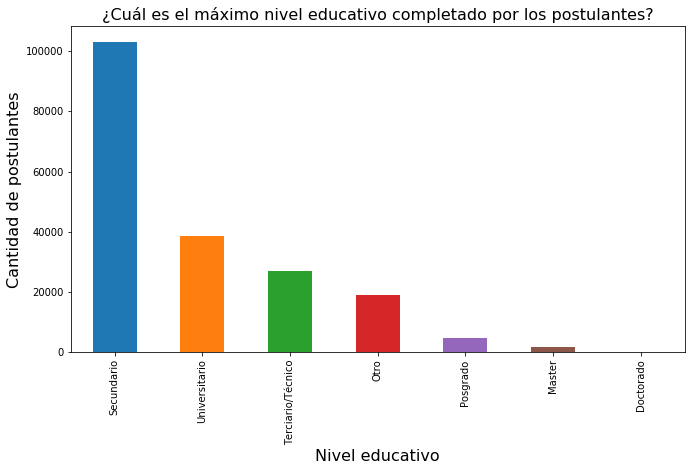

In [37]:
filtered = p_educacion.loc[(p_educacion.estado=='Graduado')]

fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(11,6));

plt.title('¿Cuál es el máximo nivel educativo completado por los postulantes?', fontsize=16)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [38]:
#¿Cuales son los niveles de estudio con mayor numero de estudiantes que se postulan?
filtered = p_educacion.loc[(p_educacion.estado=='En Curso')]

filtered['nombre'].value_counts()

Universitario        50733
Terciario/Técnico    15032
Otro                  4919
Secundario            3995
Posgrado              2239
Master                1519
Doctorado               94
Name: nombre, dtype: int64

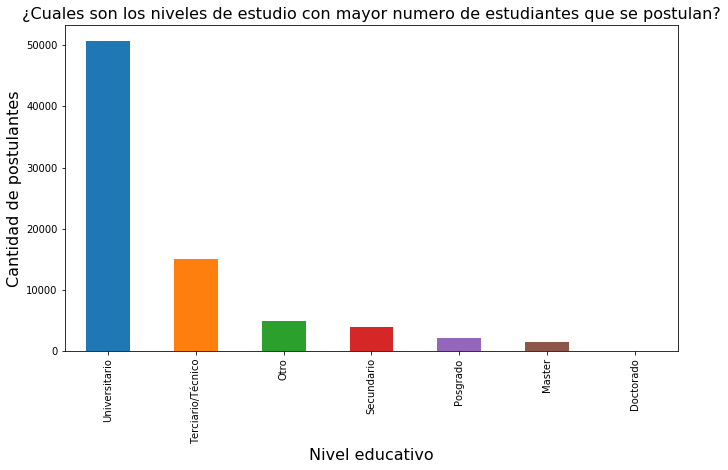

In [39]:
fig = plt.figure()

ax = filtered['nombre'].value_counts().plot(kind='bar',figsize=(11,6));

plt.title('¿Cuales son los niveles de estudio con mayor numero de estudiantes que se postulan?', fontsize=16)

ax.set_xlabel('Nivel educativo', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

# Datos segun genero y edad

In [40]:
gen_edad_validos['sexo'].value_counts()

FEM           101674
MASC           94012
NO_DECLARA       444
Name: sexo, dtype: int64

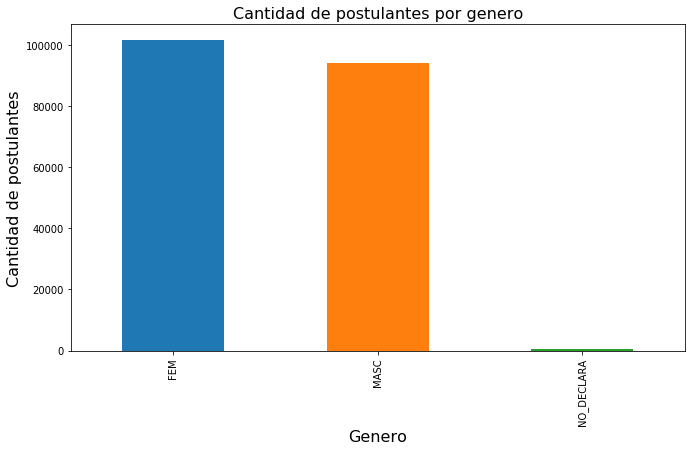

In [41]:
fig = plt.figure()

ax =gen_edad_validos['sexo'].value_counts().plot(kind='bar',figsize=(11,6));

plt.title('Cantidad de postulantes por genero', fontsize=16)

ax.set_xlabel('Genero', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

In [42]:
print(gen_edad_validos['edad'].max())
print(gen_edad_validos['edad'].min())

101
12


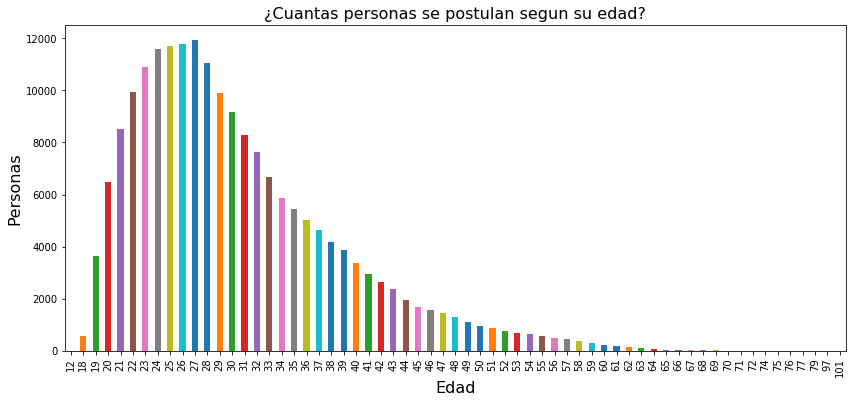

In [43]:
#gen_edad_validos= gen_edad_validos[(gen_edad_validos['edad'] <= 65) & (gen_edad_validos['edad'] >= 18)]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('¿Cuantas personas se postulan segun su edad?',  fontsize= 16)
ax.set_xlabel('Edad',  fontsize= 16)
ax.set_ylabel('Personas',  fontsize= 16)
gen_edad_validos['edad'].value_counts().sort_index().plot(kind='bar',figsize=(14,6))
plt.show()

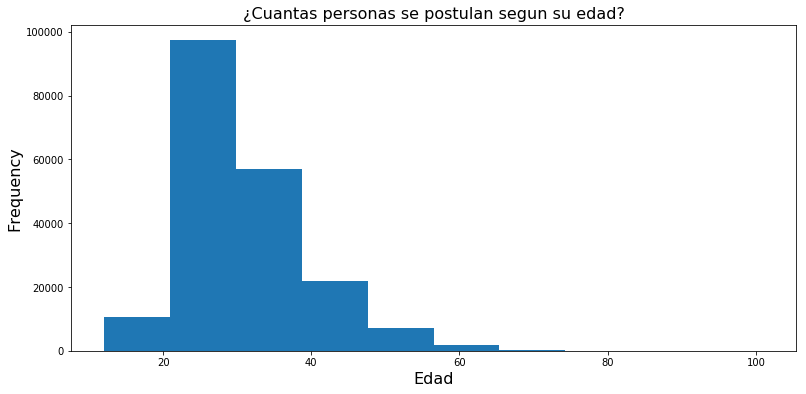

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('¿Cuantas personas se postulan segun su edad?', fontsize= 16)
ax.set_xlabel('Edad', fontsize= 16)
ax.set_ylabel('Personas',fontsize= 16)
gen_edad_validos['edad'].plot(kind='hist',figsize=(13,6))
plt.show()

# Datos de avisos

In [45]:
print(avisos_detalle['tipo_de_trabajo'].unique())

['Full-time' 'Part-time' 'Por Horas' 'Temporario' 'Fines de Semana'
 'Pasantia' 'Teletrabajo' 'Por Contrato' 'Primer empleo']


In [46]:
#cantidad de avisos por tipo de trabajo (full time, part time...)
avisos_detalle.groupby('tipo_de_trabajo').agg({'tipo_de_trabajo':'count'}).sort_values('tipo_de_trabajo',ascending=False)\
                .rename(columns={"tipo_de_trabajo": "cantidad_avisos"})

,cantidad_avisos
tipo_de_trabajo,
Full-time,12339
Part-time,863
Teletrabajo,110
Pasantia,63
Por Horas,63
Temporario,42
Por Contrato,37
Fines de Semana,14
Primer empleo,3


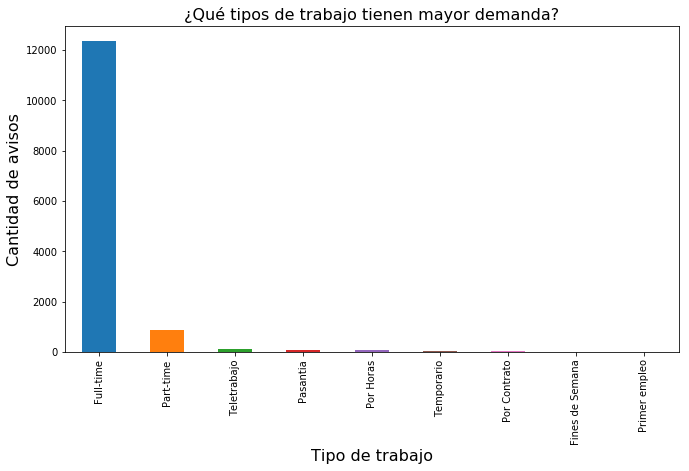

In [47]:
fig = plt.figure()

ax = avisos_detalle['tipo_de_trabajo'].value_counts().plot(kind='bar',figsize=(11,6));

plt.title('¿Qué tipos de trabajo tienen mayor demanda?', fontsize=16)

ax.set_xlabel('Tipo de trabajo', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

In [48]:
#empresas con mayor cantidad de avisos
avisos_detalle.groupby('denominacion_empresa').agg({'denominacion_empresa':'size'}).sort_values('denominacion_empresa',ascending=False)\
                      .rename(columns={"denominacion_empresa": "cantidad_avisos"}).head(20)      

,cantidad_avisos
denominacion_empresa,
RANDSTAD,562
Manpower,422
Grupo Gestión,383
Assistem,289
SOLUTIX S.A.,260
BAYTON,238
Pullmen Servicios Empresarios S.A.,229
Adecco - Región NORTE & OESTE GBA,205
Suministra,203


Text(0,0.5,'Empresa')

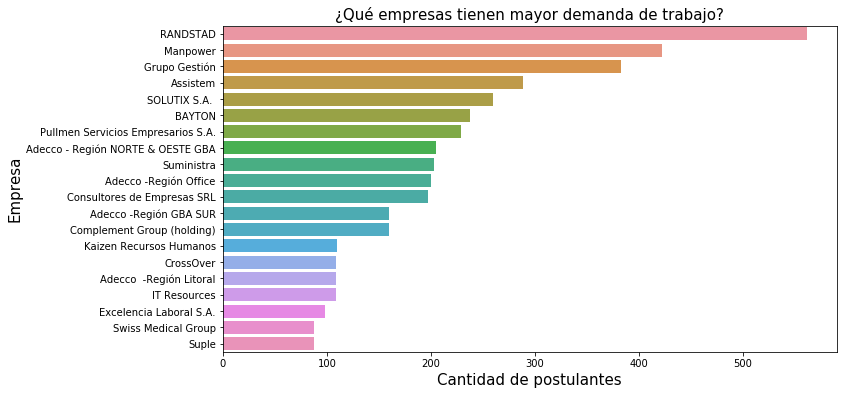

In [115]:
empresas_avisos =avisos_detalle['denominacion_empresa'].value_counts().head(20)
f, ax = plt.subplots(figsize=(11, 6))
g = sns.barplot(x=empresas_avisos.values, y=empresas_avisos.index, orient='h',ax=ax)
g.set_title("¿Qué empresas tienen mayor demanda de trabajo?", fontsize=15)
g.set_xlabel("Cantidad de postulantes", fontsize=15)
g.set_ylabel("Empresa", fontsize=15)

In [50]:
#Zonas con mayor cantidad de avisos
avisos_detalle.groupby('nombre_zona').agg({'nombre_zona':'size'}).sort_values('nombre_zona',ascending=False)\
                      .rename(columns={"nombre_zona": "cantidad_avisos"})   

,cantidad_avisos
nombre_zona,
Gran Buenos Aires,12654
Capital Federal,876
Buenos Aires (fuera de GBA),2
GBA Oeste,2


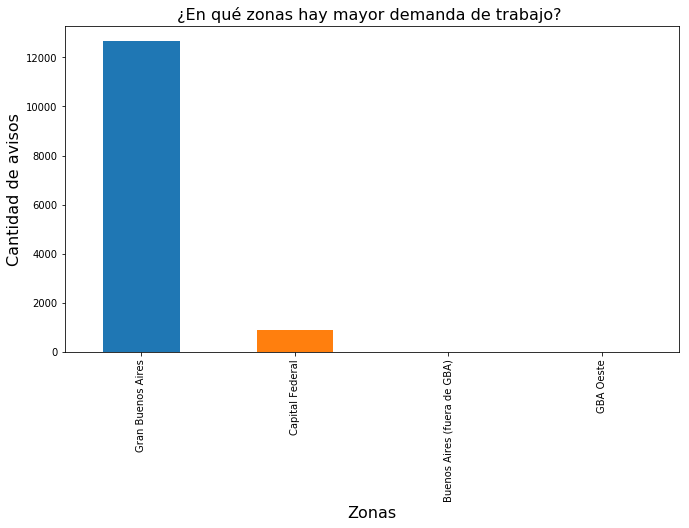

In [51]:
fig = plt.figure()

ax = avisos_detalle['nombre_zona'].value_counts().head(20).plot(kind='bar',figsize=(11,6));

plt.title('¿En qué zonas hay mayor demanda de trabajo? ', fontsize=16)

ax.set_xlabel('Zonas', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

In [52]:
#Areas con mayor cantidad de avisos
avisos_detalle.groupby('nombre_area').agg({'nombre_area':'size'}).sort_values('nombre_area',ascending=False)\
                      .rename(columns={"nombre_area": "cantidad_avisos"}).head(10)

,cantidad_avisos
nombre_area,
Ventas,1659
Comercial,983
Administración,901
Producción,821
Programación,576
Contabilidad,416
Tecnologia / Sistemas,388
Atención al Cliente,347
Mantenimiento,324


Text(0,0.5,'Area')

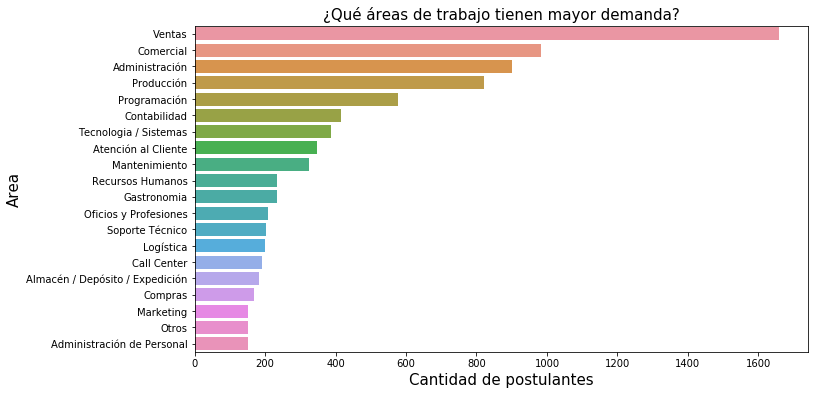

In [108]:
areas_avisos =avisos_detalle['nombre_area'].value_counts().head(20)
f, ax = plt.subplots(figsize=(11, 6))
g = sns.barplot(x=areas_avisos.values, y=areas_avisos.index, orient='h',ax=ax)
g.set_title("¿Qué áreas de trabajo tienen mayor demanda?", fontsize=15)
g.set_xlabel("Cantidad de postulantes", fontsize=15)
g.set_ylabel("Area", fontsize=15)

In [54]:
#Nivel laboral con mayor cantidad de avisos
avisos_detalle.groupby('nivel_laboral').agg({'nivel_laboral':'size'}).sort_values('nivel_laboral',ascending=False)\
                      .rename(columns={"nivel_laboral": "cantidad_avisos"})  

,cantidad_avisos
nivel_laboral,
Senior / Semi-Senior,9407
Junior,2216
Otro,921
Jefe / Supervisor / Responsable,809
Gerencia / Alta Gerencia / Dirección,181


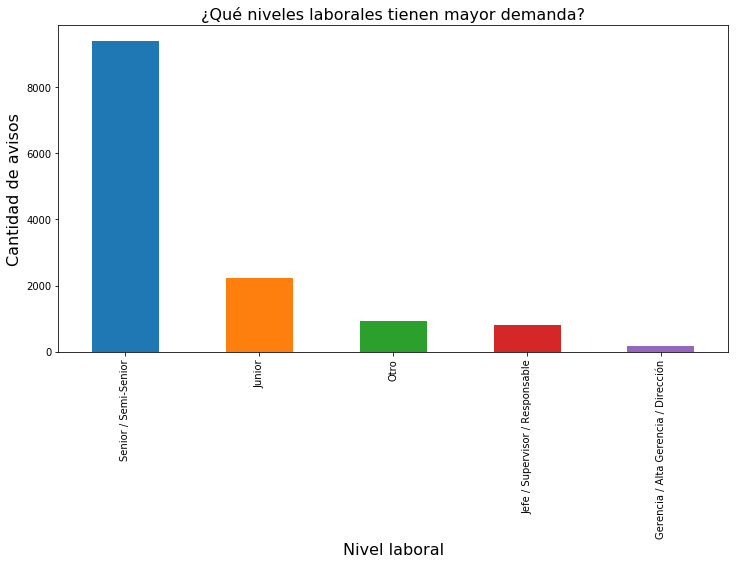

In [55]:
fig = plt.figure()

ax = avisos_detalle['nivel_laboral'].value_counts().plot(kind='bar',figsize=(12,6));

plt.title('¿Qué niveles laborales tienen mayor demanda?', fontsize=16)

ax.set_xlabel('Nivel laboral', fontsize= 16)
ax.set_ylabel('Cantidad de avisos', fontsize= 16);

# Postulaciones por dia de semana 

In [56]:
postulaciones['dia_semana'] = postulaciones['fechapostulacion'].dt.weekday_name

In [57]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
0,1112257047,NM5M,2018-01-15 16:22:34,Monday
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday
4,1112237522,5awk,2018-01-25 18:55:03,Thursday


In [58]:
postulaciones['dia_semana'].value_counts()

Wednesday    677836
Monday       668310
Tuesday      658428
Thursday     506163
Friday       446698
Sunday       226857
Saturday     217331
Name: dia_semana, dtype: int64

Text(0,0.5,'Dia de Semana')

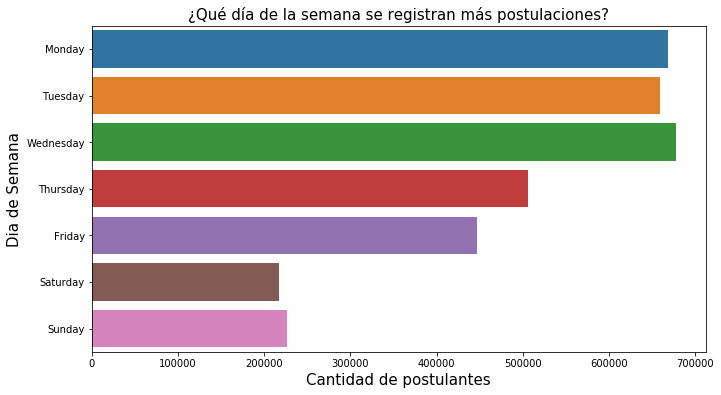

In [117]:
postulaciones_diasem =postulaciones['dia_semana'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
f, ax = plt.subplots(figsize=(11, 6))
g = sns.barplot(x=postulaciones_diasem.values, y=postulaciones_diasem.index, orient='h',ax=ax)
g.set_title("¿Qué día de la semana se registran más postulaciones?", fontsize=15)
g.set_xlabel("Cantidad de postulantes", fontsize=15)
g.set_ylabel("Dia de Semana", fontsize=15)

# Postulaciones por dia del mes

In [60]:
#Postulaciones enero
postulaciones_dia_mes = postulaciones[postulaciones['fechapostulacion'] < '02-01-2018']

In [61]:
postulaciones_dia_mes.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
0,1112257047,NM5M,2018-01-15 16:22:34,Monday
4,1112237522,5awk,2018-01-25 18:55:03,Thursday
5,1112277633,5awk,2018-01-29 13:34:44,Monday
20,1112286523,ZaO5,2018-01-24 15:07:39,Wednesday
21,1112272060,ZaO5,2018-01-24 15:20:10,Wednesday


In [62]:
postulaciones_dia_mes['dia_mes'] = postulaciones_dia_mes.loc[:,'fechapostulacion'].dt.day

c:\users\eleel\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
postulaciones_dia_mes.head()

,idaviso,idpostulante,fechapostulacion,dia_semana,dia_mes
0,1112257047,NM5M,2018-01-15 16:22:34,Monday,15
4,1112237522,5awk,2018-01-25 18:55:03,Thursday,25
5,1112277633,5awk,2018-01-29 13:34:44,Monday,29
20,1112286523,ZaO5,2018-01-24 15:07:39,Wednesday,24
21,1112272060,ZaO5,2018-01-24 15:20:10,Wednesday,24


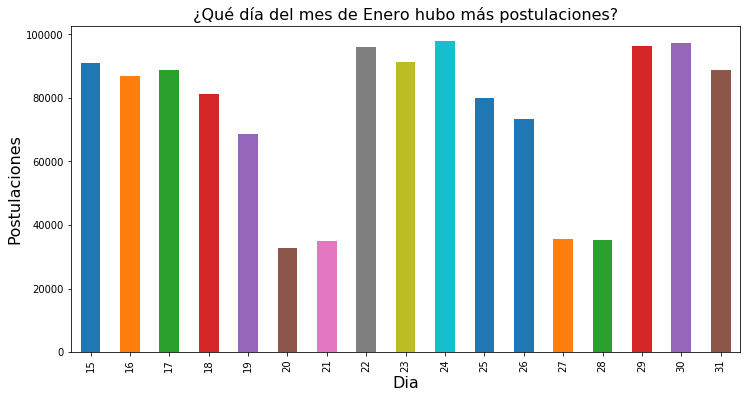

In [64]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('¿Qué día del mes de Enero hubo más postulaciones?', fontsize=16)
ax.set_xlabel('Dia', fontsize=16)
ax.set_ylabel('Postulaciones',fontsize=16)
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))

plt.show()

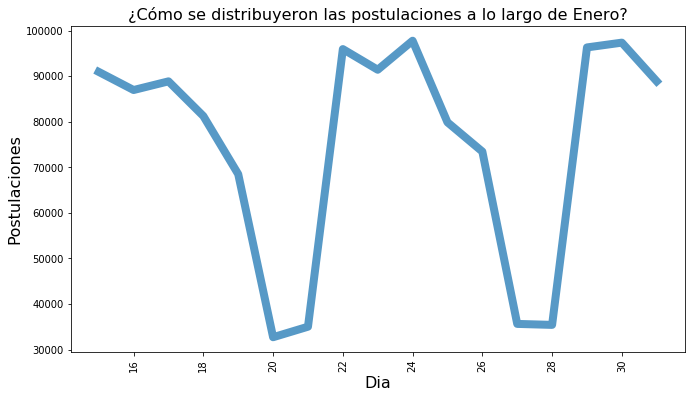

In [65]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('¿Cómo se distribuyeron las postulaciones a lo largo de Enero?', fontsize=16)
ax.set_xlabel('Dia', fontsize=16)
ax.set_ylabel('Postulaciones',fontsize=16)
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(rot=90,linewidth=8,figsize=(11,6),alpha=0.75)

plt.show()

In [66]:
#Postulaciones febrero
postulaciones_dia_mes = postulaciones[postulaciones['fechapostulacion'] >= '02-01-2018']

In [67]:
postulaciones_dia_mes.head()

,idaviso,idpostulante,fechapostulacion,dia_semana
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday
6,1112302347,5awk,2018-02-07 20:49:22,Wednesday
7,1112291495,5awk,2018-02-07 20:50:13,Wednesday


In [68]:
postulaciones_dia_mes['dia_mes'] = postulaciones_dia_mes['fechapostulacion'].dt.day

c:\users\eleel\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
postulaciones_dia_mes.head()

,idaviso,idpostulante,fechapostulacion,dia_semana,dia_mes
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday,6
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday,22
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday,22
6,1112302347,5awk,2018-02-07 20:49:22,Wednesday,7
7,1112291495,5awk,2018-02-07 20:50:13,Wednesday,7


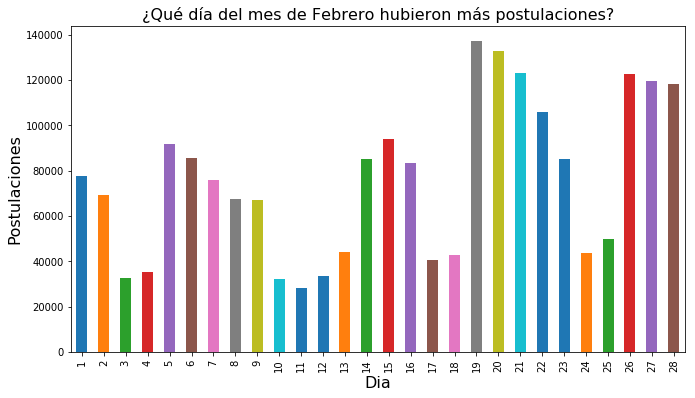

In [70]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('¿Qué día del mes de Febrero hubieron más postulaciones?', fontsize=16)
ax.set_xlabel('Dia', fontsize=16)
ax.set_ylabel('Postulaciones', fontsize=16)
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(kind='bar', figsize=(11,6))

plt.show()

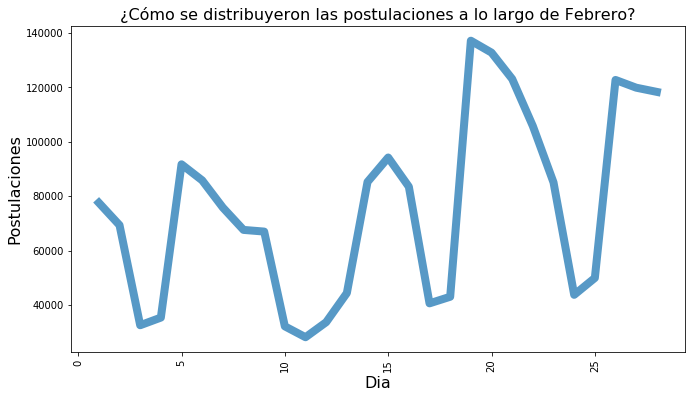

In [71]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('¿Cómo se distribuyeron las postulaciones a lo largo de Febrero?', fontsize=16)
ax.set_xlabel('Dia', fontsize=16)
ax.set_ylabel('Postulaciones', fontsize=16)
postulaciones_dia_mes['dia_mes'].value_counts().sort_index().plot(rot=90,linewidth=8,figsize=(11,6),alpha=0.75)

plt.show()

# Postulaciones por mes

In [72]:
postulaciones['mes_postulacion']=postulaciones['fechapostulacion'].dt.month
postulaciones.head()

,idaviso,idpostulante,fechapostulacion,dia_semana,mes_postulacion
0,1112257047,NM5M,2018-01-15 16:22:34,Monday,1
1,1111920714,NM5M,2018-02-06 09:04:50,Tuesday,2
2,1112346945,NM5M,2018-02-22 09:04:47,Thursday,2
3,1112345547,NM5M,2018-02-22 09:04:59,Thursday,2
4,1112237522,5awk,2018-01-25 18:55:03,Thursday,1


In [73]:
postulaciones['mes_postulacion'].value_counts()

2    2125425
1    1276198
Name: mes_postulacion, dtype: int64

In [74]:
import calendar
postulaciones['mes_postulacion'] = postulaciones['mes_postulacion'].apply(lambda x: calendar.month_abbr[x])

In [75]:
postulaciones['mes_postulacion'].head()

0    Jan
1    Feb
2    Feb
3    Feb
4    Jan
Name: mes_postulacion, dtype: object

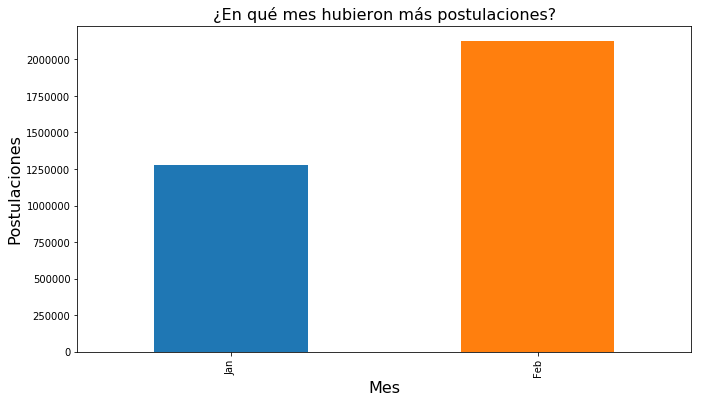

In [76]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('¿En qué mes hubieron más postulaciones?', fontsize=16)
ax.set_xlabel('Mes', fontsize=16)
ax.set_ylabel('Postulaciones', fontsize=16)
postulaciones['mes_postulacion'].value_counts().sort_values().plot(kind='bar',figsize=(11,6))

plt.show()

# Postulaciones por franja horaria

In [77]:
postulaciones['fechapostulacion'].dt.hour.value_counts()

9     274827
10    257280
8     236547
11    233871
13    220999
12    220434
14    215492
15    196633
16    181334
17    170380
7     167661
18    158875
19    145853
20    135252
21    126107
22    106293
6     104569
23     74510
5      50375
0      44981
1      27342
4      20382
2      17336
3      14290
Name: fechapostulacion, dtype: int64

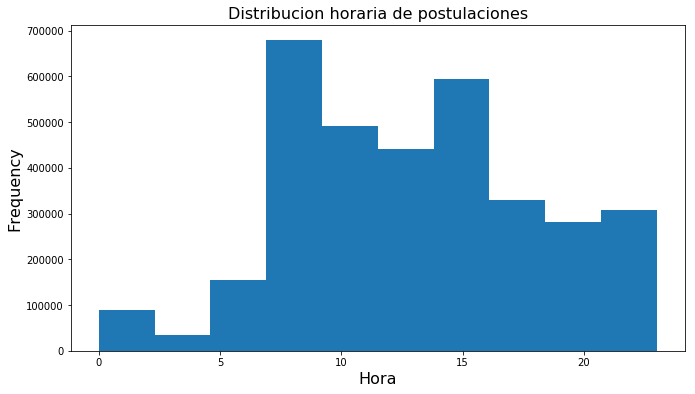

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Distribucion horaria de postulaciones', fontsize=16)
ax.set_xlabel('Hora', fontsize=16)
ax.set_ylabel('Hora', fontsize=16)
postulaciones['fechapostulacion'].dt.hour.plot(kind='hist',figsize=(11,6))

plt.show()

# Datos de vistas

In [79]:
visitas.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP


In [80]:
visitas['dia_semana'] = visitas['timestamp'].dt.weekday_name

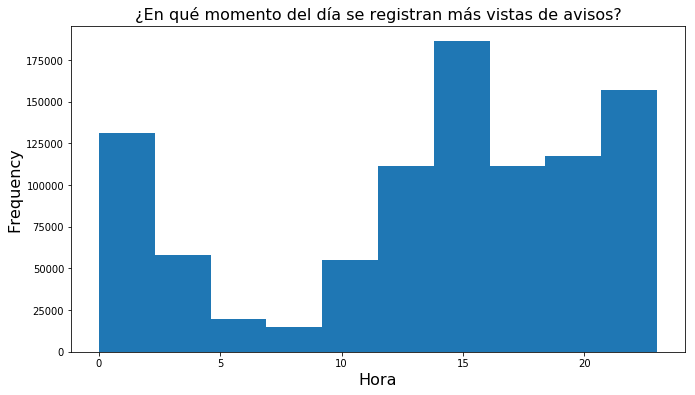

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('¿En qué momento del día se registran más vistas de avisos?',fontsize=16)
ax.set_xlabel('Hora', fontsize=16)
ax.set_ylabel('Hora', fontsize=16)
visitas['timestamp'].dt.hour.plot(kind='hist',figsize=(11,6))

plt.show()

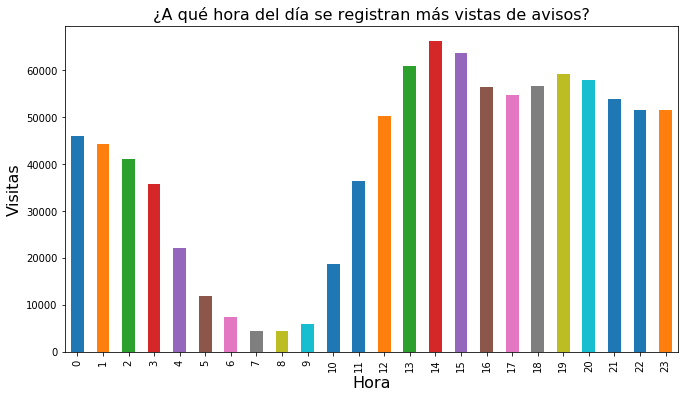

In [82]:
#lo mismo que el anterior pero por cada hora
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('¿A qué hora del día se registran más vistas de avisos?', fontsize=16)
ax.set_xlabel('Hora', fontsize=16)
ax.set_ylabel('Visitas', fontsize=16)
visitas['timestamp'].dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(11,6))

plt.show()

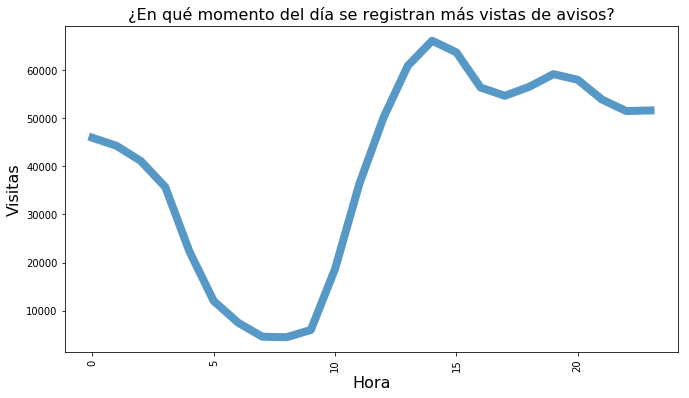

In [83]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('¿En qué momento del día se registran más vistas de avisos?', fontsize=16)
ax.set_xlabel('Hora', fontsize=16)
ax.set_ylabel('Visitas', fontsize=16)
visitas['timestamp'].dt.hour.value_counts().sort_index().plot(rot=90,linewidth=8,figsize=(11,6),alpha=0.75)

plt.show()

In [84]:
print(visitas['timestamp'].min())
print(visitas['timestamp'].max())

2018-02-23 18:38:10.808000
2018-03-01 04:59:56.812000


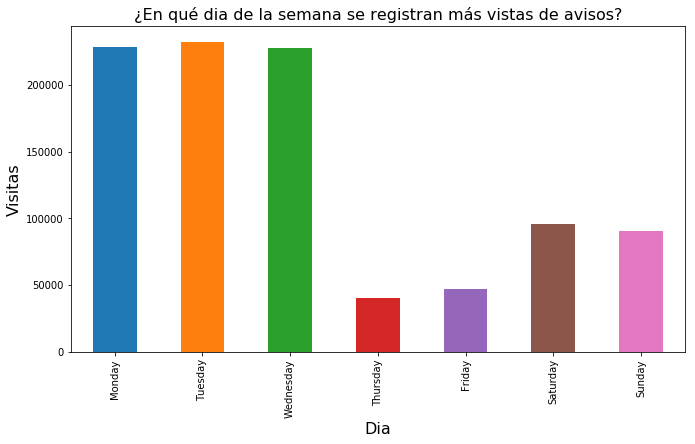

In [85]:
fig=plt.figure()
ax = fig.add_subplot(111)

plt.title('¿En qué dia de la semana se registran más vistas de avisos?', fontsize=16)
ax.set_xlabel('Dia', fontsize=16)
ax.set_ylabel('Visitas', fontsize=16)
visitas['dia_semana'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='bar', figsize=(11,6))

plt.show()


# Analisis mas complejo de datos

En esta seccion proseguiremos a buscar relaciones entre los distintos csv para poder obtener más informacion.


In [86]:
#Top 10 avisos con mayor cantidad de postulantes
cantidad_postulaciones = postulaciones.groupby('idaviso').agg({'idpostulante':'count'}).sort_values('idpostulante',ascending = False).rename(columns={"idpostulante": "cantidad_postulantes"})
cantidad_postulaciones = cantidad_postulaciones.reset_index()
avisos_cantidad_postulantes = pd.merge(cantidad_postulaciones,avisos_detalle, on= 'idaviso', how='inner') 
avisos_cantidad_postulantes[['idaviso','cantidad_postulantes','titulo','descripcion']].sort_values('cantidad_postulantes',ascending= False).head(10)

,idaviso,cantidad_postulantes,titulo,descripcion
0,1112033906,9932,Cajero/a-Repositor/a (Capital Federal),<p>Te estamos buscando para formar parte de nu...
1,1112334791,9787,Cajero/a - Part Time,<p>Te estamos buscando para formar parte de un...
2,1112204682,9244,Cajero/a - Part Time,<p>Te estamos buscando para formar parte de un...
3,1112094756,8763,Representante de Atencion al Cliente/ Banco,<p>Seleccionaremos para Importante Entidad Ban...
4,1112345900,8304,Asesores de Atención al Público - Part time,<p><em><strong>¡Sumate al equipo UP!</strong><...
5,1112319451,8025,Cajera/o (Capital Federal / Zona Norte),<p><strong>¡En FRÁVEGA tenemos nuevas OPORTUNI...
6,1112298966,7637,Representante de Atención al Cliente - Call C...,"<p><span lang=""ES"" style="""">Incorporaremos a n..."
7,1112262494,7541,OPERADORES TELEFÓNICOS DE ATENCIÓN AL CLIENTE,"<p style="""">Buscamos Operadores Telefónicos pa..."
8,1112305277,7153,CAJERO/A PART TIME - CABA,<p>Orientamos nuestra búsqueda a estudiantes ...
9,1112296264,6968,Recepcionista Administrativa - Part Time,<p>Entre sus tareas mas importantes se encuent...


In [87]:
#Tipos de aviso con mayor cantidad de postulantes
avisos_cantidad_postulantes ['titulo'].value_counts().head(10)

Analistas de Testing Ssr/Sr con Automatización // MENDOZA     20
Analista de inteligencia comercial                            20
Desarrolladores .NET C# nivel Jr. / de 6 a 18 meses de exp    18
Analista Contable                                             18
Analista de Testing manual Ssr. // Zona Recoleta CABA         18
Desarrolladores JAVA SOA / JBOSS RED HAT // Zona Recoleta     18
Programador C# .NET Sr. // Zona Tribunales                    15
Developers JAVA Ssr/Sr. - LA PLATA                            14
Analista Sr. de Arquitectura de Software JAVA - CABA          14
Analista Funcional                                            13
Name: titulo, dtype: int64

In [88]:
merge2 = pd.merge(postulaciones,avisos_detalle,on="idaviso",how="left")

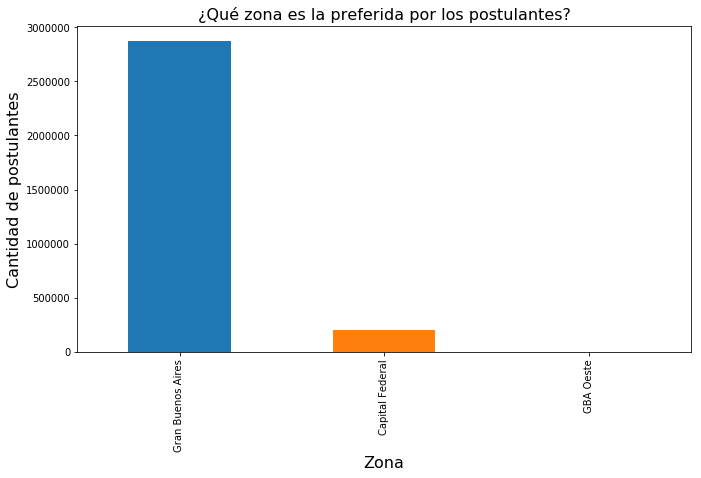

In [89]:
fig = plt.figure()

ax =merge2['nombre_zona'].value_counts().plot(kind='bar',figsize=(11,6));

plt.title('¿Qué zona es la preferida por los postulantes?', fontsize=16)

ax.set_xlabel('Zona', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

Text(0,0.5,'Tipo de trabajo')

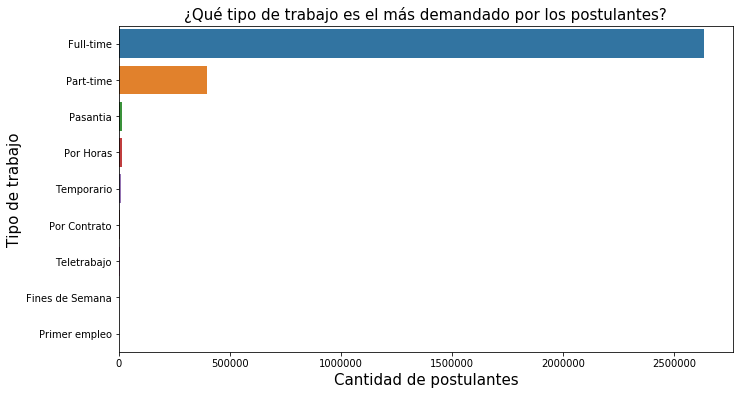

In [110]:
tipotrabajo_postulantes =merge2['tipo_de_trabajo'].value_counts().head(20)
f, ax = plt.subplots(figsize=(11, 6))
g = sns.barplot(x=tipotrabajo_postulantes.values, y=tipotrabajo_postulantes.index, orient='h',ax=ax)
g.set_title("¿Qué tipo de trabajo es el más demandado por los postulantes?", fontsize=15)
g.set_xlabel("Cantidad de postulantes", fontsize=15)
g.set_ylabel("Tipo de trabajo", fontsize=15)

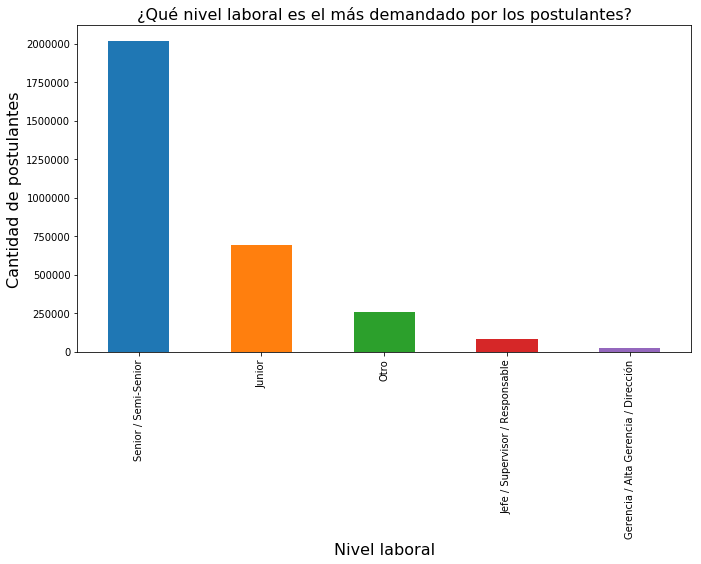

In [91]:
fig = plt.figure()

ax =merge2['nivel_laboral'].value_counts().plot(kind='bar',figsize=(11,6));

plt.title('¿Qué nivel laboral es el más demandado por los postulantes?', fontsize=16)

ax.set_xlabel('Nivel laboral', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes', fontsize= 16);

Text(0,0.5,'Empresas')

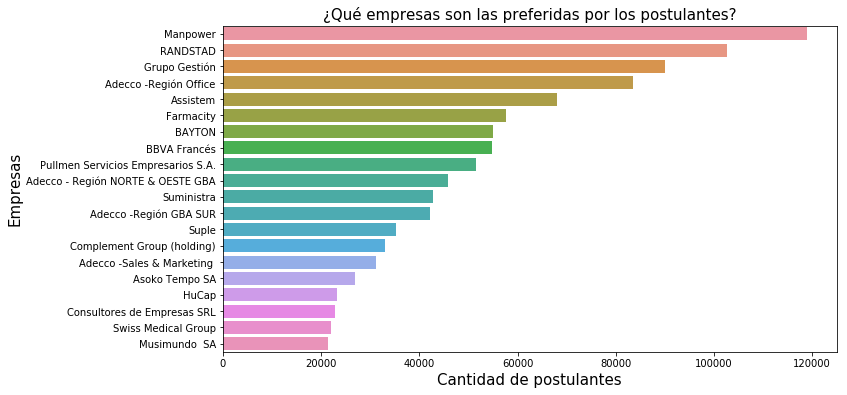

In [107]:
empresas_postulantes = merge2['denominacion_empresa'].value_counts().head(20)
empresas_postulantes
f, ax = plt.subplots(figsize=(11, 6))
g = sns.barplot(x=empresas_postulantes.values, y=empresas_postulantes.index, orient='h',ax=ax)
g.set_title("¿Qué empresas son las preferidas por los postulantes?", fontsize=15)
g.set_xlabel("Cantidad de postulantes", fontsize=15)
g.set_ylabel("Empresas", fontsize=15)

In [93]:
postulantes_genero_avisos = pd.merge(merge2,gen_edad_validos,on="idpostulante",how="left")

In [ ]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='MASC')]

ax = filtered['denominacion_empresa'].value_counts().head(20).plot(kind='bar',figsize=(11,6));

plt.title('¿Qué empresas son las más elegidas por los hombres?', fontsize=16)

ax.set_xlabel('Empresa', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

In [ ]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='FEM')]

ax = filtered['denominacion_empresa'].value_counts().head(20).plot(kind='bar',figsize=(11,6));

plt.title('¿Qué empresas son las más preferidas por las mujeres?', fontsize=16)

ax.set_xlabel('Empresa', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

In [ ]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='MASC')]

ax = filtered['nombre_area'].value_counts().head(20).plot(kind='bar',figsize=(11,6));

plt.title('¿Qué Areas de trabajo son las más elegidas por los hombres?', fontsize=16)

ax.set_xlabel('Area', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

In [ ]:
fig = plt.figure()

filtered=postulantes_genero_avisos.loc[(postulantes_genero_avisos.sexo=='FEM')]

ax = filtered['nombre_area'].value_counts().head(20).plot(kind='bar',figsize=(11,6));

plt.title('¿Qué Areas de trabajo son las más elegidas por las mujeres?', fontsize=16)

ax.set_xlabel('Area', fontsize= 16)
ax.set_ylabel('Cantidad de postulantes ', fontsize= 16);

# Top 5 - Postulaciones x Area de trabajo

Text(0,0.5,'Area')

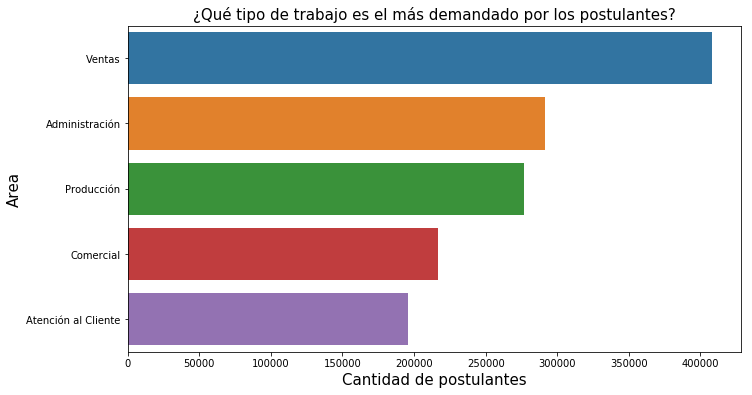

In [113]:
area_postulantes =merge2['nombre_area'].value_counts().head(5)
f, ax = plt.subplots(figsize=(11, 6))
g = sns.barplot(x=area_postulantes.values, y=area_postulantes.index, orient='h',ax=ax)
g.set_title("¿Qué tipo de trabajo es el más demandado por los postulantes?", fontsize=15)
g.set_xlabel("Cantidad de postulantes", fontsize=15)
g.set_ylabel("Area", fontsize=15)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.title('Postulaciones x Zona (Dentro de ventas)', fontsize=16)
ax.set_xlabel('Zona', fontsize=16)
ax.set_ylabel('Postulaciones', fontsize=16)
merge2[merge2['nombre_area'] == 'Ventas']['nombre_zona'].value_counts().plot(kind='bar', figsize=(11,6))
plt.show()

# Tasa de conversion de avisos (postulaciones / visitas)

Teniendo en cuenta la siguiente informacion aportada por Navent:

- Las vistas se guardan solo para usuarios logueados en el sistema? No, se guardan todas las vistas y si el usuario no está logueado en el registro no tiene el campo idUsuario (no recuerdan si filtraron y nos enviaron sólo las vistas con usuarios, pero si es asi entiendan que seguro hay vistas sin idUsuario para los avisos)
- Es posible mirar avisos sin loguearse? Si
- Es posible que el usuario se loguee solo al postularse, y no quede registado el acceso al aviso como vista? Si
- Si un usuario visita mas de una vez un aviso, se registra cada vista o se registra solo la 1ra? Todas

Como en el csv de vistas no hay idUsuario que sean null entendemos que en este csv solo tenemos las vistas de los usuarios que estaban logeados antes de postularse. Por lo tanto, puede pasar que tengamos postulaciones de usuarios pero que no tengamos las vistas previas a dicha postulacion.

In [ ]:
postulaciones.head()

In [ ]:
#me quedo con la fecha de la postulacion
postulaciones['fechapostulacion'] = postulaciones['fechapostulacion'].dt.date

In [ ]:
#lo mismo para el timestamp
visitas['timestamp'] = visitas['timestamp'].dt.date

In [ ]:
postulaciones_validas = postulaciones[postulaciones['fechapostulacion'].isin(visitas['timestamp'])]

In [ ]:
visitas_validas = visitas[visitas['timestamp'].isin(postulaciones_validas['fechapostulacion'])]

In [ ]:
visitas_validas['timestamp'].value_counts()

In [ ]:
postulaciones_validas['fechapostulacion'].value_counts()

In [ ]:
postulaciones_validas = postulaciones_validas.rename(columns={'fechapostulacion':'fecha'})
postulaciones_validas.head()

In [ ]:
visitas_validas = visitas_validas.rename(columns={'idAviso':'idaviso','timestamp':'fecha'})
visitas_validas.head()

In [ ]:
vg = visitas_validas.groupby('idaviso').agg({'idpostulante':'count'})
vg = vg.reset_index()
pg = postulaciones_validas.groupby('idaviso').agg({'idpostulante':'count'})
pg = pg.reset_index()
tasa_convergencia = pd.merge(vg,pg,on='idaviso')

In [ ]:
tasa_convergencia.head()

In [ ]:
tasa_media = tasa_convergencia['idpostulante_x'].sum() / tasa_convergencia['idpostulante_x'].count()

In [ ]:
tasa_convergencia[tasa_convergencia['idpostulante_x'] > tasa_media].head()

In [ ]:
tasa_convergencia['tasa'] = (tasa_convergencia['idpostulante_x'] / tasa_convergencia['idpostulante_y'])

In [ ]:
tasa_convergencia.set_index('idaviso')['tasa'].sort_values(ascending=False).head()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Tasa de postulacion', fontsize=16)
ax.set_xlabel('Tasa', fontsize=16)
ax.set_ylabel('ID aviso', fontsize=16)
tasa_convergencia.set_index('idaviso')['tasa'].sort_values(ascending=False).head().plot(kind='bar', figsize=(11,6))
plt.show()

# Evolucion de cantidad de visitas por dia y el nivel de estudio de los postulantes

In [ ]:
df_merge = pd.merge(p_educacion,visitas,on='idpostulante')

In [ ]:
df_merge.groupby(['timestamp','estado']).agg({'idpostulante':'count'})

In [ ]:
heap = df_merge.pivot_table(index='nombre',columns='timestamp',values='idpostulante',aggfunc='count')

In [ ]:
heap

In [ ]:
plt.subplots(figsize=(15,10))
g = sns.heatmap(heap, cmap='YlGnBu')
plt.title('Evolucion de cantidad de visitas por dia y el nivel de estudio de los postulantes', fontsize=24)

# Heatmap educacion x estado

In [96]:
heap = p_educacion.pivot_table(index='estado',columns='nombre',values='idpostulante',aggfunc='count')

In [97]:
heap

nombre,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario
estado,,,,,,,
Abandonado,15,144,947,317,3156,5692,14955
En Curso,94,1519,4919,2239,3995,15032,50733
Graduado,105,1935,18882,4831,103105,27009,38607


Text(78,0.5,'Estado')

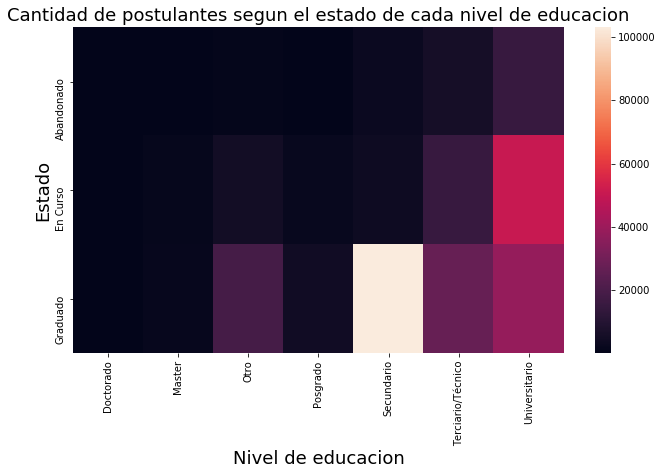

In [98]:
plt.subplots(figsize=(11,6))
g = sns.heatmap(heap)
g.set_title("Cantidad de postulantes segun el estado de cada nivel de educacion", fontsize=18)
g.set_xlabel("Nivel de educacion",fontsize=18)
g.set_ylabel("Estado", fontsize=18)